# 2. Machine Learning for Regression

In [2]:
import numpy as np
import pandas as pd

## 2.2 Data Preparation

**Prepare data and do EDA (Exploratory Data Analysis)**

In [3]:
# Downloading the data
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
!wget -c $data

--2023-09-19 23:07:13--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [4]:
# Reading in the data
df = pd.read_csv("data.csv")

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

The column names have no consistent naming convention in terms of case and white-spaces. This can be corrected / cleaned up.

In [7]:
# Everything is lower case and whitespace is replaced with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

Finding the columns that have strings as entries.

In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
# List containing all string-column names
strings = list(df.dtypes[df.dtypes == "object"].index)

In [10]:
# Apply the same transformation as with the column-names to entries
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 Exploratory Data Analysis (EDA)

- **Obtaining insights into the data**
    - Types of variables
    - How does the data look like (e.g. in plots)
    - Statistical analysis of the data (variables)

In [12]:
for col in df.columns:
    print("Column: ", col)
    print(df[col].unique()[:5])
    print("Unique Values: ", df[col].nunique())
    print()

Column:  make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Unique Values:  48

Column:  model
['1_series_m' '1_series' '100' '124_spider' '190-class']
Unique Values:  914

Column:  year
[2011 2012 2013 1992 1993]
Unique Values:  28

Column:  engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Unique Values:  10

Column:  engine_hp
[335. 300. 230. 320. 172.]
Unique Values:  356

Column:  engine_cylinders
[ 6.  4.  5.  8. 12.]
Unique Values:  9

Column:  transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Unique Values:  5

Column:  driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Unique Values:  4

Column:  number_of_doors
[ 2.  4.  3. nan]
Unique Values:  3

Column:  market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
Unique Values:  71

Column: 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

**Distribution of Price**

- How many different prices are there?

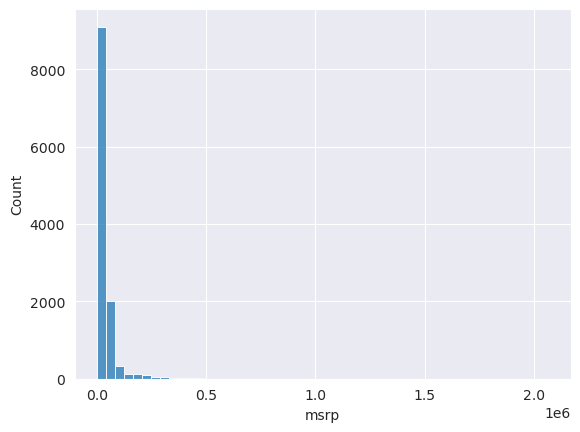

In [14]:
sns.histplot(df["msrp"], bins=50)
plt.show()

- **Insights:**
    - There are many cheap cars
    - There are nearly no cars with extremely high price
    - Long-Tailed distribution

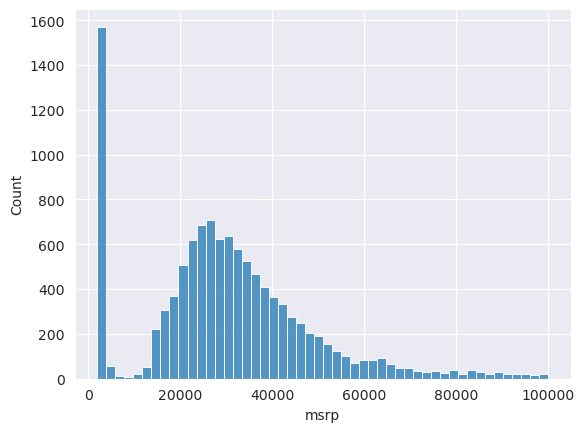

In [15]:
#  Looking into a subset of the cars (excluding very expensive cars)
sns.histplot(df["msrp"][df["msrp"] < 100_000], bins=50)
plt.show()

- **Insights:**
    - Many cars cost about $1000
    - There are also a lot of cars at the price of around $25000
    - Most products (here: cars) are cheap, but ther are very vew very expensive ones

- **Problem**
    - Long tail distribution are suboptiamal inputs for ML-Models because of the possibly big scales of the distribution

In [16]:
vals = [0, 1, 10, 1_000, 100_000]
print(np.log(vals)) # Large values are not large in log-scale
print(np.log1p(vals)) # log(1 + p) -> avoids log(0) = -inf


[       -inf  0.          2.30258509  6.90775528 11.51292546]
[ 0.          0.69314718  2.39789527  6.90875478 11.51293546]


/tmp/ipykernel_22240/1103991581.py:2: RuntimeWarning: divide by zero encountered in log
  print(np.log(vals)) # Large values are not large in log-scale


**Transforming the price-column**

In [17]:
price_logs = np.log1p(df["msrp"])
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

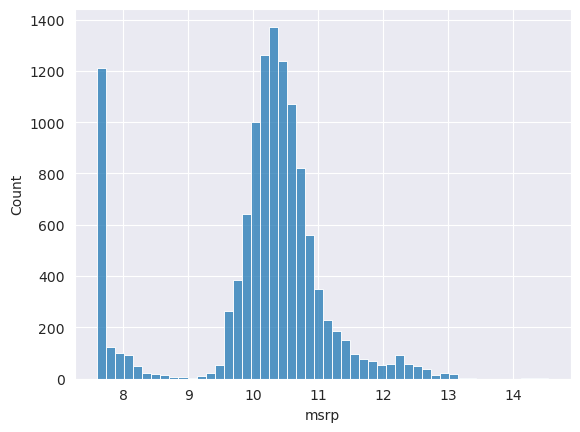

In [18]:
sns.histplot(price_logs, bins=50)
plt.show()

- **Insights:**
    - Tail of the distribution is mostly gone
    - Scale transformed from $[0, 100000]$ to approximately $[0, 15]$
    - Form of the distribution resembles the form of a normal distribution
        - Ideal situation for models; you can work better with them than with long-tailed distributions

**Missing values**

In [19]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework

In [20]:
n = len(df)

n_val = int(n * 0.2) # 20% of the dataset-size
n_test = int(n * 0.2)
n_train = n - n_val - n_test # int(n * 0.6)

n, n_val + n_test + n_train

(11914, 11914)

In [21]:
print("Train: ", n_train)
print("Test: ", n_test)
print("Val: ", n_val)

Train:  7150
Test:  2382
Val:  2382


Splitting the dataframe into sub-sets.
- **Important:** Shuffling the dataset because it may be sorted in it's original format. Sorted datasets can cause the model not to generalize well.

In [22]:
df_val = df.iloc[:n_val] 
df_test = df.iloc[n_val:(n_val + n_test)]
df_train = df.iloc[(n_val + n_test):]

In [23]:
df_val


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,porsche,cayenne,2016,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,157300
2378,porsche,cayenne,2016,diesel,240.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,diesel",midsize,4dr_suv,29,20,1715,62300
2379,porsche,cayenne,2017,premium_unleaded_(required),520.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,21,14,1715,116500
2380,porsche,cayenne,2017,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,24,18,1715,59600


**Now**: The shuffled version

In [24]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

In [25]:
df_val = df.iloc[idx[:n_val]] 
df_test = df.iloc[idx[n_val:(n_val + n_test)]]
df_train = df.iloc[idx[(n_val + n_test):]]

len(df_val), len(df_test), len(df_train)

(2382, 2382, 7150)

In [26]:
df_val # looks more shuffeled (because it is!)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7773,infiniti,q50,2015,premium_unleaded_(recommended),328.0,6.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",midsize,sedan,27,19,190,45450
9509,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,22,17,1385,32095
4682,ford,fiesta,2016,regular_unleaded,197.0,4.0,manual,front_wheel_drive,4.0,"hatchback,factory_tuner,performance",compact,4dr_hatchback,32,26,5657,21460
3701,mercedes-benz,e-class,2016,premium_unleaded_(required),302.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,sedan,28,20,617,55600


The index column is not needed and can therefore be dropped

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

**Obtaining the Target Variable $y$**

In [28]:
y_train = np.log1p(df_train["msrp"].values)
y_val = np.log1p(df_val["msrp"].values)
y_test = np.log1p(df_test["msrp"].values)

In [29]:
# Dropping the target variable from the features
del df_train["msrp"]
del df_test["msrp"]
del df_val["msrp"]

## 2.5 Linear Regression

In [30]:
df_train.iloc[10]

make                        chevrolet
model                 trailblazer_ext
year                             2004
engine_fuel_type     regular_unleaded
engine_hp                       275.0
engine_cylinders                  6.0
transmission_type           automatic
driven_wheels        rear_wheel_drive
number_of_doors                   4.0
market_category                   NaN
vehicle_size                    large
vehicle_style                 4dr_suv
highway_mpg                        18
city_mpg                           13
popularity                       1385
Name: 10, dtype: object

For the purposes of explanation, we assume that we use 3 columns

**Implementing Linear Regression**

- Mathematical formulation
    - $g(x_i) = w_0 + w_1x_{i1} + w_2x_{i2} + w_3x_{i3}$
    - $g(x_i) = w_0 + \sum_{j=1}^{3}w_jx_{ij}$
    - $g(x_i) = \mathbf{w}^T\mathbf{x}_i, \quad \mathbf{w} = [1, w_1, w_2, w_3]^T$

In [31]:
# Example: made up numbers
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [32]:
def linear_regression(xi):
    n = len(xi)
    pred = 0
    
    for j in range(n):
        pred += w[j] * xi[j]
    pred += w0

    return pred

def linear_regression_vec(xi):
    xi = np.array([1] + xi)
    W = np.array([w0] + w)

    return W.dot(xi)

In [33]:
print(f"{linear_regression(xi):.2f}")
print(f"{linear_regression_vec(xi):.2f}")

12.31
12.31


The weights $w$ indicate how much a result changes when the input is increased by 1 unit.
- The bigger a specific weight $w_j$ is the more "weight" it has on the overall result of the sum

**Important: Transforming the predicted price back from $\log$-scale**
- The function `np.expm1(·)` is used

In [34]:
y_hat = linear_regression_vec(xi)
print(f"{np.expm1(y_hat):.2f}")

222347.22


## 2.6 Linear regression: vector form

**Version 1:**
- $g(x_i) = w_0 + x_i^Tw$

In [35]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res += xi[j] * w[j]
    
    return res

def linear_regression(xi):
    return w0 + dot(xi, w)

In [36]:
print(f"{linear_regression(xi):.2f}")


12.31


**Version 2:** 
- $g(x_i) = w^Tx_i$
- $w = [w_0, w_1, ..., w_n]^T\in\mathbb{R}^{n+1}$
- $x_i = [1, x_{i1}, x_{i2}, ..., x_{in}]\in\mathbb{R}^{n+1}$

In [37]:
w_new = [w0] + w

def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [38]:
print(f"{linear_regression(xi):.2f}")

12.31


**Matrix-Version**

$$
\mathbf{X} = 
\begin{bmatrix}
1 & x_{11} & \dots & x_{1n} \\
1 & x_{21} & \dots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & \dots & x_{mn}
\end{bmatrix}\in\mathbb{R}^{m\times (n+1)}, \quad
\mathbf{w} = 
\begin{bmatrix}
w_0 \\ w_1 \\ \vdots \\ w_n
\end{bmatrix}\in\mathbb{R}^{n+1}
$$

$$
\mathbf{X}\mathbf{w} = \mathbf{y} = 
\underbrace{\begin{bmatrix}
x_1^T\mathbf{w} \\
x_2^T\mathbf{w} \\
\vdots \\
x_m^T\mathbf{w}
\end{bmatrix}}_{\text{predictions}}\in\mathbb{R}^{m}

$$

In [39]:
# Example
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [40]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11,   86]

X = np.array([x1, x2, x3])
print(X)

[[   1  148   24 1385]
 [   1  132   25 2031]
 [   1  453   11   86]]


In [41]:
# Predicts for every sample in the matrix simultaneously
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [42]:
def linear_regression(X):
    return X.dot(w_new)

In [43]:
print(f"{linear_regression(X)}")

[12.38  13.552 12.312]


## 2.7 Training linear regression: Normal equation

In [79]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [85]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
ones = np.ones(len(X))
X = np.column_stack([ones, X])
print(X)

[[1.000e+00 1.480e+02 2.400e+01 1.385e+03]
 [1.000e+00 1.320e+02 2.500e+01 2.031e+03]
 [1.000e+00 4.530e+02 1.100e+01 8.600e+01]
 [1.000e+00 1.580e+02 2.400e+01 1.850e+02]
 [1.000e+00 1.720e+02 2.500e+01 2.010e+02]
 [1.000e+00 4.130e+02 1.100e+01 8.600e+01]
 [1.000e+00 3.800e+01 5.400e+01 1.850e+02]
 [1.000e+00 1.420e+02 2.500e+01 4.310e+02]
 [1.000e+00 4.530e+02 3.100e+01 8.600e+01]]


In [86]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]
y = np.array(y)

In [ ]:
w_0, w = train_linear_regression(X, y)
print(f"w_0: {w_0:.4f}")
print(f"w: {w}")


## 2.8 Baseline model for car price prediction project

In [88]:
# extract numerical columns
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [92]:
base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
X_train = df_train[base].values # erroneous version with nan-results

Replacing missing values with $0$ does not make a lot of sense in terms of realism (replacing number of cylinders with 0 is not realistic), but works fine sometimes from a practical point of view (in practical applications, there must not be missing values in the data).

In [116]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

# Will result in nan-values if missing values present
X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

# Do predictions with the learned parameters
y_pred = w0 + X_train.dot(w)

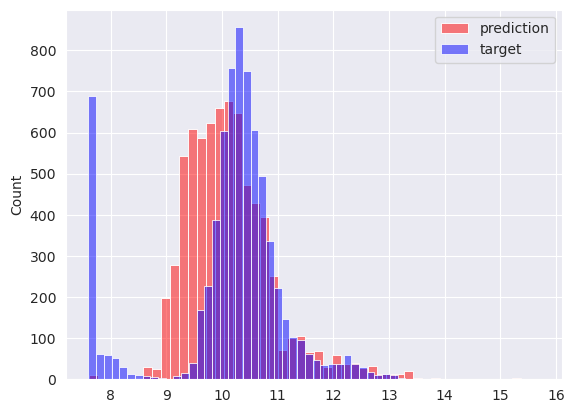

In [117]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50, label="prediction")
sns.histplot(y_train, color="blue", alpha=0.5, bins=50, label="target")
plt.legend()
plt.show()

# TODO: still some error!

- **Insights:**
    - Predicted values looks similar to the Target values, but it is still off and therefore not optimal

## 2.9 RMSE

In [118]:
def rmse(y, y_pred):
    mse = np.mean((y - y_pred)**2)
    return np.sqrt(mse)

In [120]:
RMSE_train = rmse(y_train, y_pred)
print(f"RMSE(train): {RMSE_train:.4f}")

RMSE(train): 0.7451


## 2.10 Validating the Model

In [121]:
# The previous pre-processing steps as one function
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Computing all relevant values for Evaluation:

In [122]:
# Data pre-processing of training data
X_train = prepare_X(df_train)

# Training the model
w0, w = train_linear_regression(X_train, y_train)

# Pre-processing of validation data
X_val = prepare_X(df_val)
# Compute Predictios on the validation set
y_pred = w0 + X_val @ w

Doing the Evaluation:

In [123]:

RMSE_val = rmse(y_val, y_pred)
# Very similar results
print(f"RMSE(val): {RMSE_val:.4f}")
print(f"RMSE(train): {RMSE_train:.4f}")


RMSE(val): 0.7419
RMSE(train): 0.7451


## 2.11 Simple Feature Engineering

In [124]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720
1,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640
2,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439
3,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819
4,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385
7146,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640
7147,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851
7148,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202


- The column / variable **`year`** is known as a very important variable in determining the car-price (new car -> higher price)
- Using another variable that encodes the cars age
    - Data was collected in 2017

In [126]:
df_train["year"].max() - df_train["year"]

0        9
1        1
2        1
3        0
4       12
        ..
7145    19
7146     3
7147    11
7148     1
7149     2
Name: year, Length: 7150, dtype: int64

In [134]:
# Modified data-preprocessing function
def prepare_X(df):
    df = df.copy() # avoiding call by reference changes of df
    df["age"] = 2017 - df["year"]
    features = base + ["age"]
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [140]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val @ w

rmse_age = rmse(y_val, y_pred)
print(f"RMSE: {rmse_age:.4f}")
print(f"Imporvement: {RMSE_val - rmse_age:.2f}")

RMSE: 0.5222
Imporvement: 0.22


Using the **`age`**-feature significantly improved the evaluation metric. This indicates, that the feature is indeed relevant for price prediction!

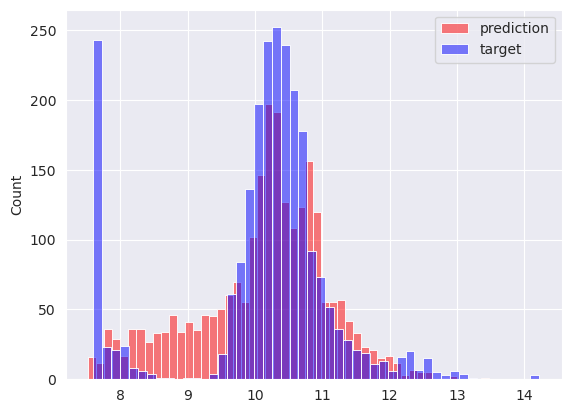

In [141]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50, label="prediction")
sns.histplot(y_val, color="blue", alpha=0.5, bins=50, label="target")
plt.legend()
plt.show()

- **Insight**:
    The peak and the shape of the predicted distributionä is closer to the true distribution